Lending Club is a service which connects people who need a loan with investors.

I will be looking at publicly available data from LendingClub.com and applying decision trees to predict loan defaults.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Here are what the columns represent:
- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Checking on the fico scores of individuals with respect to the credit policy they were given.

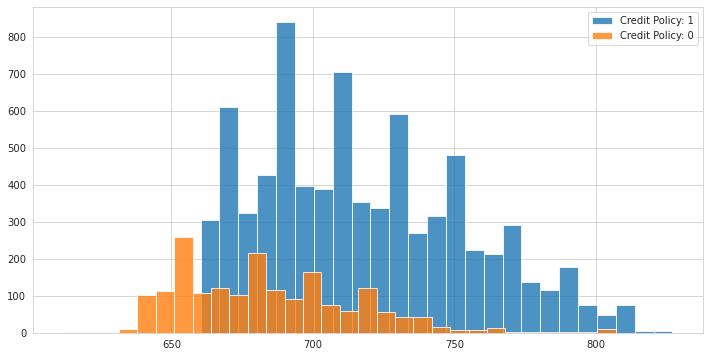

In [58]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
df[df['credit.policy']==1]['fico'].hist(bins = 30, label='Credit Policy: 1', alpha=0.8)
df[df['credit.policy']==0]['fico'].hist(bins = 30, label='Credit Policy: 0', alpha = 0.8)
plt.legend()

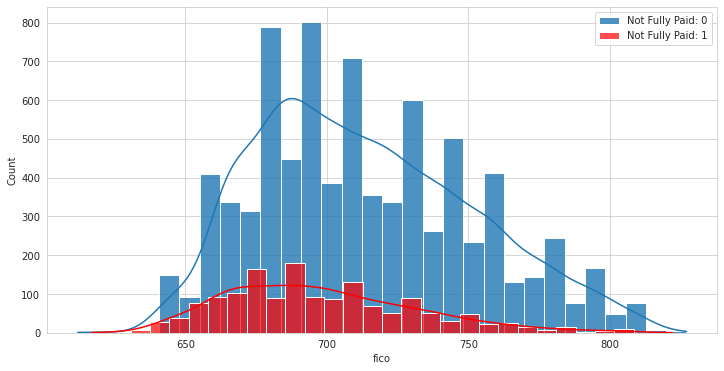

In [71]:
plt.figure(figsize=(12,6))
sns.histplot(data = df[df['not.fully.paid']==0]['fico'], bins = 30, label='Not Fully Paid: 0', alpha = 0.8, kde=True)
sns.histplot(data = df[df['not.fully.paid']==1]['fico'], bins = 30, label='Not Fully Paid: 1', alpha = 0.7, color='red', kde=True)
plt.legend()

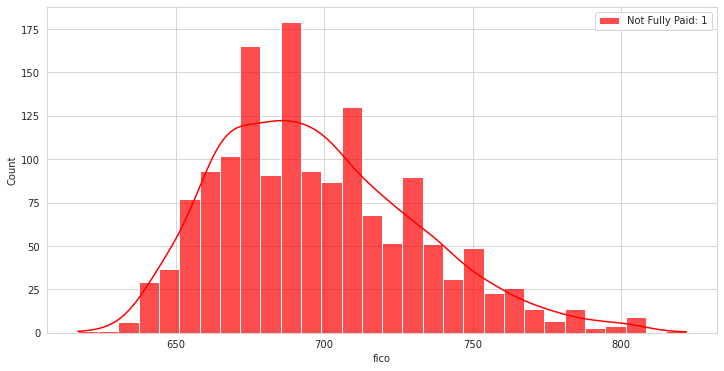

In [72]:
plt.figure(figsize=(12,6))
sns.histplot(data = df[df['not.fully.paid']==1]['fico'], bins = 30, label='Not Fully Paid: 1', alpha = 0.7, color='red', kde=True)
plt.legend()

People who have not fully paid seem to number greatest right under a 700 fico score.
Lets explore the loan purposes with a hue on fully  paid.

<AxesSubplot:xlabel='purpose', ylabel='count'>

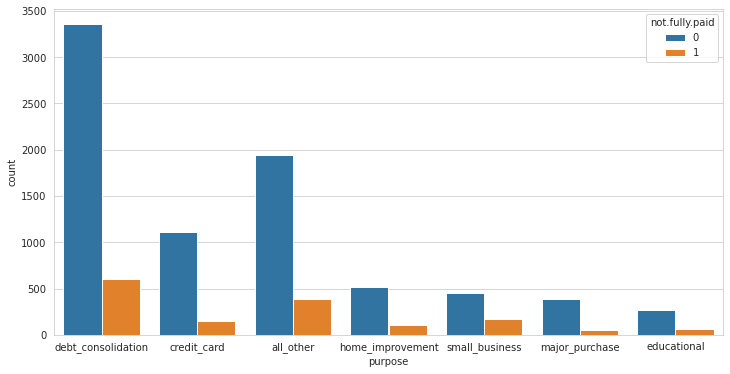

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'purpose', hue = 'not.fully.paid')

<Figure size 864x432 with 0 Axes>

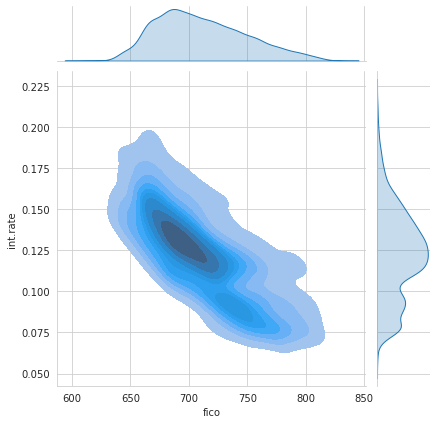

In [79]:
plt.figure(figsize=(12,6))
sns.jointplot(data = df, x='fico', y='int.rate', kind='kde', fill=True ,)

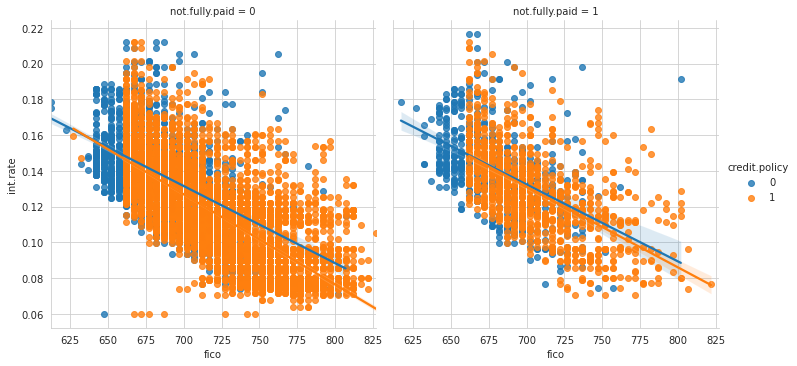

In [89]:
sns.lmplot(data = df, x = 'fico', y = 'int.rate',
           hue = 'credit.policy', col='not.fully.paid')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


I will have to prepare dummy variables for the purpose column as it is categorical

In [93]:
cat_feats = ['purpose']

In [94]:
final = pd.get_dummies(df, columns=cat_feats, drop_first=True)

In [96]:
final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


Now it's time to split our data and train the model:

In [97]:
from sklearn.model_selection import train_test_split

In [99]:
X = final.drop('not.fully.paid', axis=1)
y = final['not.fully.paid']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Creating a prediction and checking it's effectiveness with sklearn metrics:

In [103]:
pred = dtree.predict(X_test)

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

In [105]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[2219  435]
 [ 406  101]]


              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2654
           1       0.19      0.20      0.19       507

    accuracy                           0.73      3161
   macro avg       0.52      0.52      0.52      3161
weighted avg       0.74      0.73      0.74      3161



Looks like we have an accuracy rate of 73% not terrible but lets see how it compares with random forests.

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [112]:
rfc_pred = rfc.predict(X_test)

In [113]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[2642   12]
 [ 500    7]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2654
           1       0.37      0.01      0.03       507

    accuracy                           0.84      3161
   macro avg       0.60      0.50      0.47      3161
weighted avg       0.77      0.84      0.77      3161



Definite increase in metrics and quality of model fit, with 84% accuracy now, however the recall value for 'not.fully.paid==1' did much worse in the random forsts model, being 1% instead of 20% for the dtree.
Which model we would use really depends on the specific questions we are trying to answer and that would normally be guided by some business goal in mind. Though overall accuracy was better with random forests.